# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Solução do problema com dependência do statsmodels

In [1]:
# Retire o comentário da linha de código abaixo caso precise fazer a correção

# !pip install scipy==1.2 --upgrade

### Importando bibliotecas

https://pandas.pydata.org/

https://www.numpy.org/

https://seaborn.pydata.org/

In [2]:
import statsmodels.api
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

### Lendo o dataset do projeto

In [3]:
df = pd.read_csv('dados.csv')

In [4]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---

# <font color=green>2 RODANDO UMA REGRESSÃO LINEAR</font>
***

## Dataset de exemplo
> ### $Y$ = Gasto das famílias
> ### $X$ = Renda das Famílias

In [5]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [6]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [7]:
dataset.shape

(50, 2)

### Estatísticas descritivas

In [8]:
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


### Análise gráfica

https://seaborn.pydata.org/generated/seaborn.boxplot.html

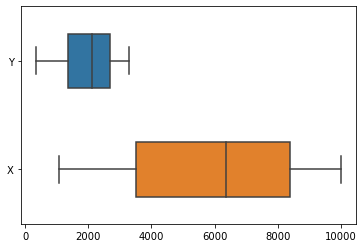

In [9]:
ax = sns.boxplot(data=dataset, orient='h', width=0.5)

https://seaborn.pydata.org/generated/seaborn.lmplot.html

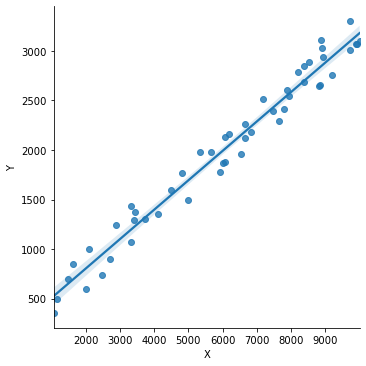

In [10]:
ax = sns.lmplot(data=dataset, x='X', y='Y')

In [11]:
print(vars(ax))

{'_tight_layout_rect': [0, 0, 1, 1], '_tight_layout_pad': None, '_extract_legend_handles': False, '_n_facets': 1, '_col_wrap': None, '_ncol': 1, '_nrow': 1, '_fig': <Figure size 360x360 with 1 Axes>, '_axes': array([[<AxesSubplot:xlabel='X', ylabel='Y'>]], dtype=object), '_axes_dict': {}, '_legend': None, 'data':        X     Y
0   9714  3011
1   3728  1305
2   6062  1879
3   8845  2654
4   8378  2849
5   3338  1068
6   8507  2892
7   7947  2543
8   9915  3074
9   1632   849
10  6825  2184
11  8918  2943
12  4100  1357
13  9184  2755
14  6180  2163
15  9997  3099
16  4500  1600
17  1069   353
18  5925  1778
19  2466   740
20  6083  2129
21  9712  3302
22  7780  2412
23  8383  2683
24  7185  2515
25  7483  2395
26  7640  2292
27  2100  1000
28  2000   600
29  6012  1864
30  8902  3027
31  5345  1978
32  8210  2791
33  5662  1982
34  2700   900
35  6546  1964
36  2900  1247
37  9894  3067
38  1500   700
39  5000  1500
40  8885  3110
41  8813  2644
42  3446  1378
43  7881  2601
44  1164  

### Análise da correlação

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [12]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


### Modelo de regressão linear simples

https://www.statsmodels.org/stable/regression.html

In [13]:
import statsmodels.api as sm

In [14]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [15]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [16]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


Regressão Linear com Scipy

In [17]:
st.linregress(x=dataset.X, y=dataset.Y)

LinregressResult(slope=0.29729069099372424, intercept=207.90331377756547, rvalue=0.9848351799854276, pvalue=3.555543228586393e-38, stderr=0.007559237533768474, intercept_stderr=50.126682183394216)

In [18]:
0.9848351799854276**2

0.9699003317369296

### Estimando o modelo

In [19]:
resultado_regressão = sm.OLS(Y, X).fit()

In [20]:
resultado_regressão.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.56e-38
Time:                        11:22:29   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.000     107.117     308.690
X              0.2973      0.008     39.328      0.000       0.282       0.312
==============================================================================
Omnibus:                       22.833   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.915
Skew:                           0.073   Prob(JB):                        0.141
Kurtosis:                       1.637   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Obtendo as previsões dentro da amostra

In [21]:
dataset['Y_previsto'] = resultado_regressão.predict()
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


---

# <font color=green>3 CORRELAÇÃO</font>
***

## <font color=green>3.1 Covariância</font>
***

A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:

### Covariância populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Covariância amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

### Gerando uma amostra aleatória para facilitar o entendimento

In [22]:
amostra = df.query("Renda < 5000").sample(n = 20, random_state=101)
amostra

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
5051,14,0,39,8,6,1500,1.616243
72082,52,0,29,8,7,1000,1.752518
5521,15,1,21,8,12,3500,1.694016
13849,22,0,49,2,13,1570,1.804156
14285,22,0,29,8,9,600,1.785481
57207,41,1,34,2,12,1200,1.746864
14720,23,0,32,4,12,2000,1.663362
17552,23,0,32,8,6,500,1.693730
49020,35,0,24,6,7,1300,1.656948
2852,13,0,53,8,5,600,1.667109


In [23]:
df[['Idade','Anos de Estudo','Renda']].corr()

,Idade,Anos de Estudo,Renda
Idade,1.000000,-0.267614,0.041357
Anos de Estudo,-0.267614,1.000000,0.332152
Renda,0.041357,0.332152,1.000000


### Obtendo a matriz de covariância

In [24]:
amostra[['Idade','Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


### Identificando as variâncias na diagonal principal da matriz

In [25]:
amostra.Idade.var()

134.4105263157895

## <font color=green>3.2 Interpretação da Covariância</font>
***

Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

### Verificando a existência de uma associação linear negativa

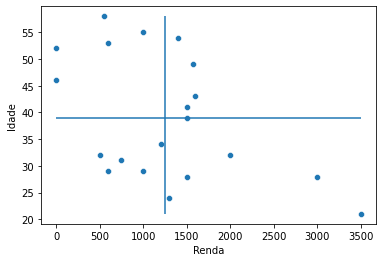

In [26]:
ax = sns.scatterplot(data=amostra, x='Renda', y='Idade')
ax.hlines(y=amostra['Idade'].mean(), xmin=amostra['Renda'].min(), xmax=amostra['Renda'].max())
ax.vlines(ymin=amostra['Idade'].min(), x=amostra['Renda'].mean(), ymax=amostra['Idade'].max())

### Verificando a existência de uma associação linear positiva

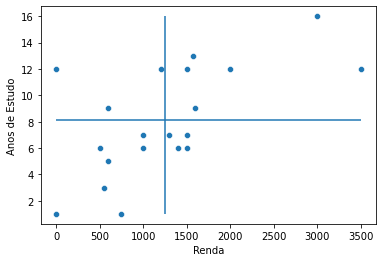

In [27]:
ax = sns.scatterplot(data=amostra, x='Renda', y='Anos de Estudo')
ax.hlines(y=amostra['Anos de Estudo'].mean(), xmin=amostra['Renda'].min(), xmax=amostra['Renda'].max())
ax.vlines(ymin=amostra['Anos de Estudo'].min(), x=amostra['Renda'].mean(), ymax=amostra['Anos de Estudo'].max())

### Verificando a inexistência de uma associação linear entre as variáveis

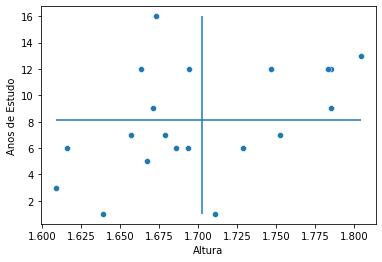

In [28]:
ax = sns.scatterplot(data=amostra, x='Altura', y='Anos de Estudo')
ax.hlines(y=amostra['Anos de Estudo'].mean(), xmin=amostra['Altura'].min(), xmax=amostra['Altura'].max())
ax.vlines(ymin=amostra['Anos de Estudo'].min(), x=amostra['Altura'].mean(), ymax=amostra['Anos de Estudo'].max())

### <font color='red'>Observação Importante:</font>
> Pelo que foi apresentado pode parecer que valores elevados, tanto positivos quanto negativos, para a covariância indicam relações lineares fortes entre as variáveis envolvidas. No entanto, um problema quando se usa a covariância como uma medida da intensidade da relação linear é que o valor da covariância depende das unidades de medida para x e y.
> 
> Uma medida da relação entre duas variáveis que não é afetada pelas unidades de medida para x e y é o coeficiente de correlação que veremos no próximo tópico.

## <font color=green>3.3 Coeficiente de correlação de Pearson</font>
***

É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

### Obtendo $s_{xy}$

In [29]:
s_xy = df[["Altura","Renda"]].cov()
s_xy

,Altura,Renda
Altura,0.006355,-1.078964e+00
Renda,-1.078964,1.104491e+07


In [30]:
s_xy = s_xy["Altura"].loc["Renda"]
s_xy

-1.0789639314252701

### Obtendo $s_x$ e $s_y$

In [31]:
s_x = df['Altura'].std()
s_y = df['Renda'].std()
print(s_x)
print(s_y)

0.07971743006825309
3323.3877303470294


### Obtendo o coeficiente de correlação $r_{xy}$

In [32]:
r_xy = (s_xy)/(s_x*s_y)
r_xy

-0.004072608143399507

### Obtendo uma matriz de correlação com o Pandas

In [33]:
df[["Altura","Renda"]].corr()

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


In [34]:
dataset.corr()

,Y,X,Y_previsto
Y,1.000000,0.984835,0.984835
X,0.984835,1.000000,1.000000
Y_previsto,0.984835,1.000000,1.000000


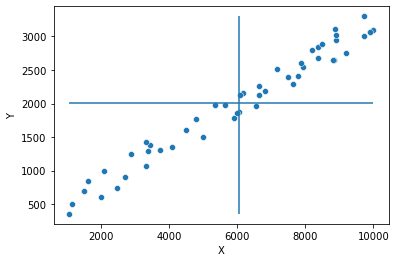

In [35]:
X = dataset["X"]
Y = dataset["Y"]
ax = sns.scatterplot(data=dataset, x='X', y='Y')
ax.hlines(y=Y.mean(), xmin=X.min(), xmax=X.max())
ax.vlines(ymin=Y.min(), x=X.mean(), ymax=Y.max())

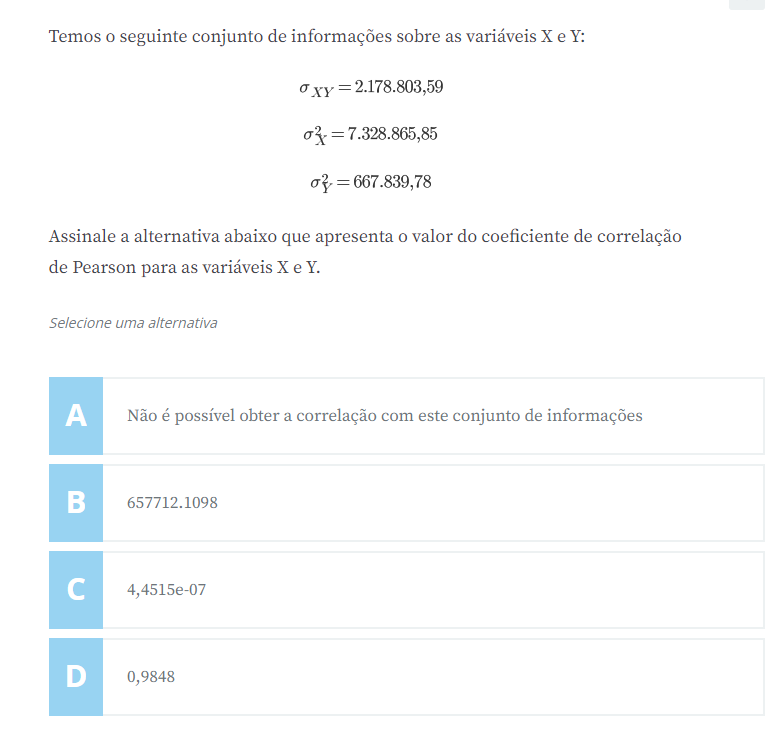

In [36]:
sigma_xy = 2178803.59
sigma_x = np.sqrt(7328865.85)
sigma_y = np.sqrt(667839.78)
r_xy = sigma_xy/(sigma_x*sigma_y)
r_xy

0.984835179852382

---

# <font color=green>4 REGRESSÃO LINEAR</font>
***

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

#### Terminologia

> A variável que é prevista é conhecida como variável dependente (*Y*).

> A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).

Em nosso treinamento vamos abordar o tipo mais simples de análise de regressão que considera uma variável dependente e apenas uma variável independente onde a relação entre as variáveis se aproxima de uma linha reta.

## <font color=green>4.1 Regressão linear simples</font>
***

### Função consumo

Um economista famoso do passado concluiu em um de seus estudos que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente esta teoria ganhou um pouco mais de complexidade, mas vamos utilizar sua forma mais simples para entender o procedimento de análise de regressão com a seguninte formulação:

# $$Y_i = \beta_1 + \beta_2X_i$$

Onde

- $Y_i$ é o gasto das famílias ou consumo das famílias

- $X_i$ é a renda disponível

- $\beta_1$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_2$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_1$ e $\beta_2$ com base nas observações de $Y$ e $X$.

### Carregando o dataset

In [37]:
dataset.drop(columns=["Y_previsto"], inplace=True)

In [38]:
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


### Identificando a relação entre as variáveis

https://seaborn.pydata.org/generated/seaborn.lmplot.html

Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

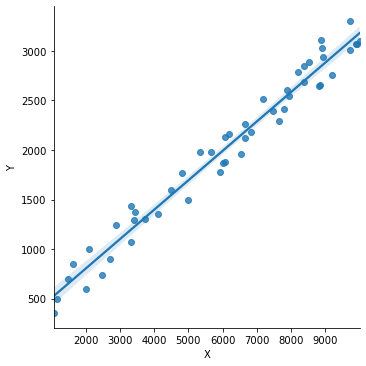

In [39]:
ax = sns.lmplot(data=dataset, x="X", y="Y")

### Matriz de correlação

In [40]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


### Função de regressão populacional

A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

# $$E(Y|X_i) = \beta_1 + \beta_2X_i$$

Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. O coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também são conhecidos como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

O gráfico de dispersão acima deixa claro que com o aumento da renda familiar, em média, as despesas de consumo das famílias aumentam, mas não no mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma
família agrupam-se em torno do consumo médio de todas as famílias deste nível $X_i$, isto é, em torno de sua esperança condicional $E(Y|X_i)$. Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

ou

# $$Y_i = E(Y|X_i) + u_i$$

onde o desvio $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também cohecida como termo de erro estocástico.

Observe que a podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

## <font color=green>4.2 O método de mínimos quadrados</font>
***

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

# $$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$$
# $$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

# $$\hat{u}_i = Y_i - \hat{Y}_i$$
# $$\hat{u}_i = Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

# $$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos tem o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**.

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

## <font color=green>4.3 Estimadores de mínimos quadrados ordinários</font>
***

### Obter $n$

In [41]:
n = len(dataset)
n

50

### Obter $\sum{Y}$

In [42]:
soma_Y = dataset.Y.sum()
soma_Y

100556

### Obter $\sum{X}$

In [43]:
soma_X = dataset.X.sum()
soma_X

303275

### Obter $\sum{X^2}$

In [44]:
temp = dataset.X*dataset.X
temp

0     94361796
1     13897984
2     36747844
3     78234025
4     70190884
5     11142244
6     72369049
7     63154809
8     98307225
9      2663424
10    46580625
11    79530724
12    16810000
13    84345856
14    38192400
15    99940009
16    20250000
17     1142761
18    35105625
19     6081156
20    37002889
21    94322944
22    60528400
23    70274689
24    51624225
25    55995289
26    58369600
27     4410000
28     4000000
29    36144144
30    79245604
31    28569025
32    67404100
33    32058244
34     7290000
35    42850116
36     8410000
37    97891236
38     2250000
39    25000000
40    78943225
41    77668969
42    11874916
43    62110161
44     1354896
45    11566801
46    44102881
47    11082241
48    44195904
49    23040000
Name: X, dtype: int64

In [45]:
soma_X2 = temp.sum()
soma_X2

2198628939

In [46]:
303275*303275

91975725625

### Obter $\sum{Y^2}$

In [47]:
soma_Y2 = (dataset.Y*dataset.Y).sum()
soma_Y2

234954332

### Obter $\sum{XY}$

In [48]:
soma_XY = (dataset.X*dataset.Y).sum()
soma_XY

716683794

### Obter $\hat{\beta}_2$

# $$\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}$$

In [49]:
Beta2 = (n*(soma_XY)-(soma_X*soma_Y))/(n*(soma_X2)-(soma_X)**2)
Beta2

0.29729069099372424

### Obter $\hat{\beta}_1$

# $$
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
$$ 

In [50]:
Beta1 = dataset.Y.mean() - (Beta2*dataset.X.mean())
Beta1

207.90331377756547

### Obtendo a estimativa dos parâmetros com o StatsModels

### Importando a biblioteca
https://www.statsmodels.org/stable/index.html

In [51]:
import statsmodels.api as sm
import scipy.stats as st

In [52]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

Feito com Scipy

In [53]:
st.linregress(x=dataset.X, y=dataset.Y)

LinregressResult(slope=0.29729069099372424, intercept=207.90331377756547, rvalue=0.9848351799854276, pvalue=3.555543228586393e-38, stderr=0.007559237533768474, intercept_stderr=50.126682183394216)

In [54]:
import pingouin as pg

In [55]:
pg.linear_regression(X=dataset.X, y=dataset.Y).round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,207.9033,50.1267,4.1476,0.0001,0.9699,0.9693,107.1169,308.6898
1,X,0.2973,0.0076,39.3281,0.0000,0.9699,0.9693,0.2821,0.3125


### Estimando o modelo

In [56]:
resultado_regressao = sm.OLS(Y,X, missing='drop').fit()
resultado_regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.56e-38
Time:                        11:22:36   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.000     107.117     308.690
X              0.2973      0.008     39.328      0.000       0.282       0.312
==============================================================================
Omnibus:                       22.833   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.915
Skew:                           0.073   Prob(JB):                        0.141
Kurtosis:                       1.637   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando os parâmetros estimados

In [57]:
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

### Intervalo de confiança para os parâmetros estimados

In [58]:
resultado_regressao.conf_int(alpha=0.05)

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


Onde temos o número de domicílios que possuem computador (Y) e a renda total recebida por pessoas de 10 anos ou mais (X), em cada um dos estados brasileiros.

Acredita-se que a posse de computadores tenha uma relação linear com a renda das famílias e para comprovar isso, podemos estimar uma regressão linear com os dados acima e avaliar os resultados obtidos.

Neste problema, precisamos, inicialmente, obter as estimativas dos parâmetros de regressão.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R$ 4,2, significa que ele tem uma renda total de R$ 4.200.000.

Utilize o ferramental do statsmodels para obter os parâmetros.

Segue o dataset em formato de dicionário Python para facilitar a solução do problema:

In [59]:
datasetE = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}
datasetE = pd.DataFrame(datasetE)
datasetE.head()

,Y,X
0,670,1.59
1,220,0.56
2,1202,2.68
3,188,0.47
4,1869,5.20


In [60]:
pg.linear_regression(X=datasetE.X, y=datasetE.Y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-168.321156,77.565787,-2.170044,3.970933e-02,0.996792,0.996663,-328.070885,-8.571427
1,X,481.390397,5.462133,88.132315,1.065860e-32,0.996792,0.996663,470.140924,492.639870


## <font color=green>4.4 Obtendo previsões</font>
***

# $$\hat{Y}_i = 207,9033 + 0,2973X_i$$

### Previsões dentro da amostra

In [61]:
dataset["Y^"] = Beta1 + Beta2*dataset["X"]
dataset.head()

,Y,X,Y^
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


### Utilizando o statsmodels

In [62]:
dataset["Y^ statsmodels"]  = resultado_regressao.predict()
dataset.head()

,Y,X,Y^,Y^ statsmodels
0,3011,9714,3095.785086,3095.785086
1,1305,3728,1316.203010,1316.203010
2,1879,6062,2010.079483,2010.079483
3,2654,8845,2837.439476,2837.439476
4,2849,8378,2698.604723,2698.604723


In [63]:
dataset.drop(columns=["Y^ statsmodels"], inplace=True)
dataset.head()

,Y,X,Y^
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


### Estimando o 'Gasto das Famílias' fora da amostra

In [64]:
def prever(x):
    return Beta1+Beta2*x

In [65]:
prever(7510)

2440.5564031404347

### Estimando o 'Gasto das Famílias' fora da amostra via StatsModels

In [66]:
resultado_regressao.predict([1,7510])

array([2440.55640314])

Considerando os dados do problema anterior, onde se acredita que a posse de computadores tenha uma relação linear com a renda das famílias, após estimarmos o modelo (problema anterior), suponha que seja criado um estado e que este apresente uma renda total de R$ 2.345.678.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R$ 4,2, significa que ele tem uma renda total de R$ 4.200.000.

Utilize o ferramental do statsmodels para solucionar o problema.

Segue o dataset em formato de dicionário Python para facilitar a solução do problema:

Y é o número de domicílios que possuem computador
X é a renda total recebida por pessoas de 10 anos ou mais, em cada um dos estados brasileiros
Assinale a alternativa que apresenta a previsão (valor arredondado) para o número de domicílios que possuem computador neste novo estado da federação.

In [67]:
datasetE = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}
datasetE = pd.DataFrame(datasetE)
datasetE.head()

,Y,X
0,670,1.59
1,220,0.56
2,1202,2.68
3,188,0.47
4,1869,5.20


In [68]:
intercepto, coeficiente_angular = pg.linear_regression(X = datasetE.X, y=datasetE.Y, coef_only=True)

In [69]:
def preverE(x):
    return intercepto+coeficiente_angular*x

In [70]:
preverE(2.345678)

960.8657076138504

In [71]:
datasetE["U^"] = pg.linear_regression(X = datasetE.X, y=datasetE.Y).residuals_
datasetE

,Y,X,U^
0,670,1.59,72.910425
1,220,0.56,118.742534
2,1202,2.68,80.194892
3,188,0.47,130.067669
4,1869,5.20,-465.908908
5,248,0.58,137.114726
6,477,1.32,9.885832
7,1294,3.88,-405.473584
8,816,2.11,-31.412582
9,2671,5.53,177.232261


## <font color=green>4.5 Resíduos</font>
***

Como vimos anteriormente, o resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

In [72]:
dataset["u"] = dataset.Y - dataset["Y^"]
dataset.head()

,Y,X,Y^,u
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [73]:
dataset["Residuos"] = pg.linear_regression(X=dataset.X, y=dataset.Y).residuals_
dataset.head()

,Y,X,Y^,u,Residuos
0,3011,9714,3095.785086,-84.785086,-84.785086
1,1305,3728,1316.203010,-11.203010,-11.203010
2,1879,6062,2010.079483,-131.079483,-131.079483
3,2654,8845,2837.439476,-183.439476,-183.439476
4,2849,8378,2698.604723,150.395277,150.395277


In [74]:
dataset.drop(inplace=True, columns=["u"])
dataset.head()

,Y,X,Y^,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [75]:
dataset.Residuos.mean()

2.0463630789890885e-14

## <font color=green>4.6 Suposições sobre o termo de erro $u$</font>
***

### 1. O termo de erro $u$ é uma variável aleatória com média igual a zero: $E(u) = 0$
### 2. A variância de $u$ é a mesma para todos os valores de $X$
### 3. O valores de $u$ são independentes
### 4. O termo de erro $u$ é uma variável aleatória normalmente distribuída.

### Plotando os resíduos do modelo

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

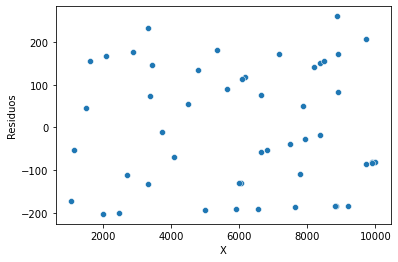

In [76]:
ax = sns.scatterplot(x=dataset.X, y=dataset.Residuos)

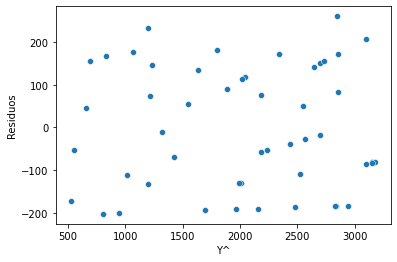

In [77]:
ax = sns.scatterplot(x=dataset["Y^"], y=dataset.Residuos)

### Hipótese de variância constante

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

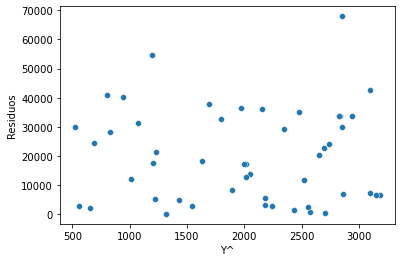

In [78]:
ax = sns.scatterplot(x=dataset["Y^"], y=dataset.Residuos**2)

## <font color=green>4.7 O coeficiente de determinação $R^2$</font>
***

O **coeficiente de determinação R²** é uma medida resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

Sabemos que o i-ésimo resíduo representa o erro de usarmos $\hat{Y}_i$ para estimar $Y_i$. A soma dos quadrados desses resíduos é o valor que é minimizado pelo método dos mínimos quadrados. Esse valor pode ser representado da seguinte forma:

# $$SQE = \sum{(Y_i - \hat{Y}_i)^2}$$

O valor da SQE é uma medida do erro de se usar a equação de regressão estimada para estimar os valores da variável dependente na amostra.

Outro componente que podemos medir é a soma dos quadrados total (SQT) que representa a medida do erro envolvido no uso da média ($\bar{Y}$) para fazer as estimativas. A SQT pode ser representada da forma abaixo:

# $$SQT = \sum{(Y_i - \bar{Y})^2}$$

Para quantificar o quanto os valores estimados ($\hat{Y}_i$) se afastam da média ($\bar{Y}$) podemos obter mais uma soma de quadrados. Essa soma é chamada de soma dos quadrados da regressão (SQR) e é representada pela seguinte fórmula:

# $$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$$


### Soma do quadrados do erros (SQE)

In [79]:
dataset.head()

,Y,X,Y^,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [80]:
SQE = dataset.Residuos.apply(lambda u: u**2).sum()
SQE

984986.0375191917

In [81]:
#sum of square residuals
resultado_regressao.ssr

984986.037519191

### Soma do quadrados total (SQT)

In [82]:
SQT = dataset.Y.apply(lambda y: (y-dataset.Y.mean())**2).sum()
SQT

32724149.279999997

### Soma do quadrados da regressão (SQR)

In [83]:
SQR = dataset["Y^"].apply(lambda y: (y-dataset.Y.mean())**2).sum()
SQR

31739163.242480807

In [84]:
#explained sum of squares
resultado_regressao.ess

31739163.242480807

### Relação entre as somas de quadrados

# $$SQT = SQR + SQE$$

Onde,


### $SQE = \sum{(Y_i - \hat{Y}_i)^2}$

### $SQT = \sum{(Y_i - \bar{Y})^2}$

### $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$


<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img029.png" width=50%>

### Coeficiente de determinação (R²)

A regressão estimada teria um ajuste perfeito se todos os valores da variável dependente ($Y_i$) estiverem sobre a reta de regressão estimada. Quando isso ocorre temos $Y_i - \hat{Y}_i = 0$ para todas as observações, o que resulta em uma $SQE = 0$. Como $SQT=SQR+SQE$, é possível deduzir que para termos um ajuste perfeito $SQT$ deve ser igual a $SQR$ e a razão entre estas medidas ($\frac{SQR}{SQT}$) deve ser igual a 1.

Quando o ajuste não é tão perfeito nota-se que a $SQE$ apresenta valores maiores o que faz a razão $\frac{SQR}{SQT}$ diminuir, e em uma situação de total imperfeição do ajuste teríamos uma $SQR=0$ e $SQE=SQT$ levando a $\frac{SQR}{SQT}=0$.

A razão $\frac{SQR}{SQT}$, que assume valores entre 0 e 1, é utilizada como medida de eficiência do ajuste da equação de regressão estimada. Essa medida é conhecida como coeficiente de determinação (R²).

# $$R^2 = \frac{SQR}{SQT}$$

## <font color='red'>Observação</font>
> Somente com a utilização do R² não é possível tirar conclusões sobre a relação entre $Y$ e $X$ ser ou não ser estatisticamente
significativa. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

In [85]:
R2 = SQR/SQT
R2

0.9699003317369297

In [86]:
resultado_regressao.rsquared

0.9699003317369297

In [87]:
pg.linear_regression(X=dataset.X, y=dataset.Y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,207.903314,50.126682,4.147558,1.362270e-04,0.9699,0.969273,107.116864,308.689763
1,X,0.297291,0.007559,39.328132,3.555543e-38,0.9699,0.969273,0.282092,0.312490


Considerando os dados do problema proposto em exercícios anteriores, onde se acredita que a posse de computadores tenha uma relação linear com a renda das famílias.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de RS 4,2, significa que ele tem uma renda total de RS 4.200.000.

Utilize o ferramental do statsmodels para solucionar o problema.
Segue o dataset em formato de dicionário Python para facilitar a solução do problema:

Y é o número de domicílios que possuem computador
X é a renda total recebida por pessoas de 10 anos ou mais, em cada um dos estados brasileiros
Assinale a alternativa que apresenta o valor do R² obtido de nossa regressão linear.

In [90]:
datasetE = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}

datasetE = pd.DataFrame(datasetE)
datasetE.head()

,Y,X
0,670,1.59
1,220,0.56
2,1202,2.68
3,188,0.47
4,1869,5.20


In [91]:
pg.linear_regression(X=datasetE.X, y=datasetE.Y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-168.321156,77.565787,-2.170044,3.970933e-02,0.996792,0.996663,-328.070885,-8.571427
1,X,481.390397,5.462133,88.132315,1.065860e-32,0.996792,0.996663,470.140924,492.639870


## <font color=green>4.8 Testes aplicados a modelos de regressão</font>
***

Como vimos, em uma regressão linear simples, a média da variável dependente ($Y$) é uma função linear da variável independente ($X$):

# $$Y_i = \beta_1 + \beta_2X_i$$

Se o valor de $\beta_2$ for zero podemos verificar que o valor médio de $Y$ não depende do valor de $X$ e, portanto, concluímos que $X$ e $Y$ não estão linearmente relacionados. De forma alternativa, se o valor de $\beta_2$ não for igual a zero, concluímos que as duas variáveis estão relacionadas.

Para testar se a relação de regressão é significativa, é preciso realizar um **teste de hipóteses** para determinar se o valor de $\beta_2$ é zero. Antes de realizar este tipo de teste precisamos obter uma estimativa para $\sigma^2$ (variância do erro).

### Output do modelo de regressão estimado

In [93]:
regressao = pg.linear_regression(X=dataset.X, y=dataset.Y)
regressao.round(5)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,207.90331,50.12668,4.14756,0.00014,0.9699,0.96927,107.11686,308.68976
1,X,0.29729,0.00756,39.32813,0.00000,0.9699,0.96927,0.28209,0.31249


In [105]:
regressao['T'][0]

4.14755784189551

In [94]:
resultado_regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.56e-38
Time:                        11:32:09   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.000     107.117     308.690
X              0.2973      0.008     39.328      0.000       0.282       0.312
==============================================================================
Omnibus:                       22.833   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.915
Skew:                           0.073   Prob(JB):                        0.141
Kurtosis:                       1.637   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Erro quadrático médio - estimativa de $\sigma^2$

Lembre-se que a **soma dos quadrados do erros (SQE)** é uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudadas anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos $n-2$ graus de liberdade.

O **erro quadrático médio**, representado pela equação abaixo, pode ser obtido dividindo-se a SQE por $n-2$ graus de liberdade.

# $$EQM = \frac{SQE}{n-2}$$

In [99]:
SQE

984986.0375191917

In [102]:
n

50

In [101]:
EQM = SQE/(n-2)
EQM

20520.542448316493

In [103]:
resultado_regressao.mse_resid

20520.54244831648

### Teste de hipótese para nulidade do coeficiente angular

Considere o seguinte modelo de regressão linear simples:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis.

Considere agora que $b_1$ e $b_2$ são nossos estimadores de mínimos quadrados. Considere que a distribuição amostral de $b_2$ segue uma normal e também as seguintes propriedades:

# $$E(b_2) = \beta_2$$
# $$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Como não conhecemos o valor de $\sigma$, utilizamos $s$ como estimativa:

# $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note que o valor esperado de $b_2$ é $\beta_2$, logo, $b_2$ é um estimador não viesado de $\beta_2$. Abaixo temos a estatística de teste (t) que segue uma distribuição t de Student com $n-2$ graus de liberdade.

# $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

### Calculando $s$

In [106]:
s = np.sqrt(EQM)
s

143.2499300115588

### Calculando $\sum{(X_i - \bar{X})^2}$

In [108]:
Soma_desvios2 = dataset.X.apply(lambda x: (x-dataset.X.mean())**2).sum()
Soma_desvios2

359114426.5

### Calculando $s_{b_2}$

In [109]:
s_beta_2 = s/np.sqrt(Soma_desvios2)
s_beta_2

0.007559237533768462

### Determinando as áreas de aceitação e rejeição de $H_0$

In [110]:
from scipy.stats import t as tstudent

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img031.png)

### Níveis de confiança e significância

In [111]:
alpha = 0.05
gamma = 1-alpha

In [118]:
dof = n-2
regressao.df_resid_

48

### Obtendo $t_{\alpha/2}$

In [120]:
t_alpha_2 = tstudent.ppf(0.5+(gamma/2), dof)
t_alpha_2

2.0106347546964454

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img032.png)

### Obtendo $t = \frac{b_2 - \beta_2}{s_{b_2}}$

In [121]:
t = (Beta2 - 0)/s_beta_2
t

39.32813192675501

In [125]:
regressao.round(10)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,207.903314,50.126682,4.147558,0.000136,0.9699,0.969273,107.116864,308.689763
1,X,0.297291,0.007559,39.328132,0.000000,0.9699,0.969273,0.282092,0.312490


In [124]:
resultado_regressao.tvalues

const     4.147558
X        39.328132
dtype: float64

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img033.png)

### Etapas e regras de decisão do teste t de significância dos parâmetros

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img030.png" width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$

In [126]:
t <= -t_alpha_2

False

In [127]:
t >= t_alpha_2

True

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [133]:
p_value = 2*(tstudent.sf(t, dof))
p_value.round(50)

3.555543228586e-38

In [134]:
resultado_regressao.pvalues

const    1.362270e-04
X        3.555543e-38
dtype: float64

In [135]:
regressao['pval']

0    1.362270e-04
1    3.555543e-38
Name: pval, dtype: float64

In [136]:
p_value <= alpha

True

In [137]:
regressao

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,207.903314,50.126682,4.147558,1.362270e-04,0.9699,0.969273,107.116864,308.689763
1,X,0.297291,0.007559,39.328132,3.555543e-38,0.9699,0.969273,0.282092,0.312490


### <font color='green'>Conclusão: Rejeitamos $H_0$ e concluímos que existe uma relação significativa entre as duas variáveis.</font>

---

### Teste F

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

Em nosso caso (regressão linear simples) ele fornece a mesma conclusão obtida com o teste t.

**Hipóteses:**

## $H_0: \beta_2 = 0$
## $H_0: \beta_2 \neq 0$

**Estatística de teste:**

# $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Onde,

$SQR$ - soma dos quadrados da regressão

$SQE$ - soma dos quadrados dos erros

$k$ - total de variáveis independentes ($X$)

**Regras de rejeição de $H_0$:**

**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

Onde,

$F_{\alpha}$ - baseia-se na distribuição F com $k$ graus de liberdade no numerador e $n-k-1$ no denominador.

**Critério do p-valor** $\rightarrow$ Rejeitar se $p-valor \leq \alpha$

### Calculando a estatística de teste ($F$)

In [138]:
resultado_regressao.mse_model

31739163.242480807

In [139]:
resultado_regressao.mse_resid

20520.54244831648

In [141]:
F = resultado_regressao.mse_model/resultado_regressao.mse_resid
F

1546.701960848248

In [142]:
resultado_regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.56e-38
Time:                        13:43:45   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.000     107.117     308.690
X              0.2973      0.008     39.328      0.000       0.282       0.312
==============================================================================
Omnibus:                       22.833   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.915
Skew:                           0.073   Prob(JB):                        0.141
Kurtosis:                       1.637   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
resultado_regressao.fvalue

1546.701960848248

In [143]:
regressao

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,207.903314,50.126682,4.147558,1.362270e-04,0.9699,0.969273,107.116864,308.689763
1,X,0.297291,0.007559,39.328132,3.555543e-38,0.9699,0.969273,0.282092,0.312490


### Obtendo o p-valor

In [152]:
p_value = resultado_regressao.f_pvalue
p_value

3.5555432285859737e-38

In [146]:
from scipy.stats import f

In [148]:
f.sf(F, 1, 48)

3.5555432285859737e-38

In [151]:
p_value <= alpha

True

# <font color=green>5 EXTRAS</font>
***

## <font color=green>5.1 Outros testes</font>
***

### Normalidade dos resíduos - Omnibus

> ### $H_0:$ Os dados se distribuem como uma normal

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [163]:
from scipy.stats import normaltest
w, p_value = normaltest(dataset.Residuos)
p_value

1.1012451024592903e-05

In [160]:
p_value<=alpha

True

In [157]:
dataset.Residuos

0     -84.785086
1     -11.203010
2    -131.079483
3    -183.439476
4     150.395277
5    -132.259640
6     155.044778
7     -27.472435
8     -81.540515
9     155.918279
10    -52.912280
11     83.858304
12    -69.795147
13   -183.221020
14    117.840216
15    -80.918352
16     54.288577
17   -172.707062
18   -191.350658
19   -201.022158
20    112.677413
21    206.809495
22   -108.824890
23    -17.091176
24    171.063071
25    -37.529554
26   -187.204193
27    167.786235
28   -202.484696
29   -131.214948
30    172.614955
31    181.077943
32    142.340113
33     90.836794
34   -110.588179
35   -189.968177
36    176.953682
37    -82.297410
38     46.160650
39   -194.356769
40    260.668897
41   -183.926174
42    145.632965
43     50.148751
44    -52.949678
45     73.011046
46    -57.210793
47    233.415976
48     75.708172
49    135.101369
Name: Residuos, dtype: float64

In [162]:
pg.normality(dataset.Residuos, alpha=0.05, method="normaltest")

,W,pval,normal
Residuos,22.832968,0.000011,False


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

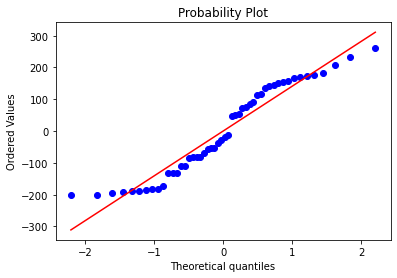

In [167]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_,(_,_,_)) = probplot(dataset.Residuos, plot=plt)

<AxesSubplot:>

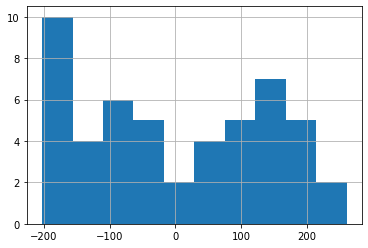

In [170]:
dataset.Residuos.hist()

<AxesSubplot:>

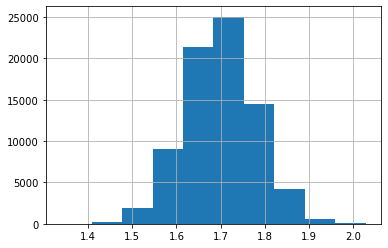

In [168]:
df["Altura"].hist()

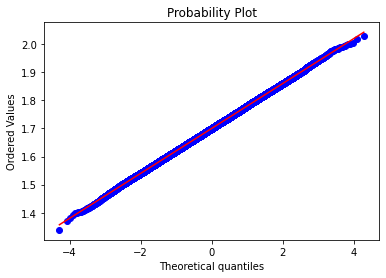

In [169]:
(_,(_,_,_)) = probplot(df["Altura"], plot=plt)

### Verificando a simetria

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [173]:
regressao

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,207.903314,50.126682,4.147558,1.362270e-04,0.9699,0.969273,107.116864,308.689763
1,X,0.297291,0.007559,39.328132,3.555543e-38,0.9699,0.969273,0.282092,0.312490


In [175]:
resultado_regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.56e-38
Time:                        15:53:30   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.000     107.117     308.690
X              0.2973      0.008     39.328      0.000       0.282       0.312
==============================================================================
Omnibus:                       22.833   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.915
Skew:                           0.073   Prob(JB):                        0.141
Kurtosis:                       1.637   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
from scipy.stats import skew

S = skew(dataset.Residuos)
S

0.07306920116444231

### Verificando a curtose

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

In [177]:
from scipy.stats import kurtosis

C = 3+kurtosis(dataset.Residuos)
C

1.6369621580686424

### Normalidade dos resíduos - Jarque-Bera (statsmodels)

> ### $H_0:$ Os dados se distribuem como uma normal

> ### Estatística de teste
> ### $$JB = \frac{n}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$
> #### Onde,
> #### $n$ - número de observações
> #### $S$ - Coeficiente de assimetria
> #### $C$ - Coeficiente de curtose

In [180]:
JB = (n/6)*(S**2 + (1/4)*(C-3)**2)
JB

3.9150595649419406

In [181]:
from scipy.stats import chi2

p_value = chi2.sf(JB, 2)
p_value

0.1412068019728551

In [182]:
p_value <=0.05

False

### Normalidade dos resíduos - Jarque-Bera (Correção)

> ### $H_0:$ Os dados se distribuem como uma normal

> ### Estatística de teste
> ### $$JB = \frac{n-k}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$
> #### Onde,
> #### $n$ - número de observações
> #### $k$ - número de parâmetros do modelo
> #### $S$ - Coeficiente de assimetria
> #### $C$ - Coeficiente de curtose

In [183]:
JB = (n-1/6)*(S**2 + (1/4)*(C-3)**2)
JB

23.412056198352804

In [184]:
from scipy.stats import chi2

p_value = chi2.sf(JB, 2)
p_value

8.243973584284949e-06

In [185]:
p_value <=0.05

True